# Aviation Accident Analysis: Group 2

#### Group Members: Vidhi Desai, Prachi Gehlot, Priya Upadhyay

# Data Cleaning

In [181]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Aviation_Data_final.csv", encoding='latin-1')

C:\Users\Vidhi Desai\AppData\Local\Temp\ipykernel_3640\2588210471.py:7: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [182]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,state_ID,state,Country,Latitude,Longitude,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24-10-1948,"MOOSE CREEK, ID",ID,Idaho,United States,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19-07-1962,"BRIDGEPORT, CA",CA,California,United States,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Landing,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,30-08-1974,"Saltville, VA",VA,Virginia,United States,36.922223,-81.878056,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,19-06-1977,"EUREKA, CA",CA,California,United States,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,02-08-1979,"Canton, OH",OH,Ohio,United States,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [183]:
df.columns = df.columns.str.lower() #convert all column names to lowercase
df.columns = df.columns.str.replace('.', '_')

In [184]:
df.head()

,event_id,investigation_type,accident_number,event_date,location,state_id,state,country,latitude,longitude,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,24-10-1948,"MOOSE CREEK, ID",ID,Idaho,United States,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19-07-1962,"BRIDGEPORT, CA",CA,California,United States,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Landing,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,30-08-1974,"Saltville, VA",VA,Virginia,United States,36.922223,-81.878056,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,19-06-1977,"EUREKA, CA",CA,California,United States,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,02-08-1979,"Canton, OH",OH,Ohio,United States,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [185]:
#Check number of missing values per column
df.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
state_id                   6628
state                      6712
country                     226
latitude                  54483
longitude                 54492
airport_code              38736
airport_name              36163
injury_severity               0
aircraft_damage               0
aircraft_category         56580
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
far_description           56844
schedule                  76286
purpose_of_flight          6192
air_carrier               72220
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition             0
broad_phase_of_flight         0
report_s

In [186]:
# Remove columns with more than 30k missing values and not important columns

columns_to_drop = ['latitude', 'longitude', 'airport_code', 'airport_name', 'aircraft_category', 'far_description',
                   'schedule', 'air_carrier','accident_number', 'registration_number', 'amateur_built', 
                   'publication_date', 'report_status', 'total_uninjured']

df_clean = df.drop(columns=columns_to_drop)

In [187]:
df_clean.isnull().sum()

event_id                      0
investigation_type            0
event_date                    0
location                     52
state_id                   6628
state                      6712
country                     226
injury_severity               0
aircraft_damage               0
make                         63
model                        92
number_of_engines          6084
engine_type                7096
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [188]:
df_clean.shape

(88865, 19)

In [189]:
#Fill the NA values of following columns with 0
df_clean['total_fatal_injuries'] = df_clean['total_fatal_injuries'].fillna(0)
df_clean['total_minor_injuries'] = df_clean['total_minor_injuries'].fillna(0)
df_clean['total_serious_injuries'] = df_clean['total_serious_injuries'].fillna(0)

# Create a new column total_injuries which is the sum of all these injuries
df_clean['total_injuries'] = df_clean['total_fatal_injuries'] + df_clean['total_minor_injuries'] + df_clean['total_serious_injuries']

In [190]:
# Delete Rows
# df_clean.dropna(axis = 0, inplace = True)

df_clean['country'].replace('', np.nan, inplace=True)

C:\Users\Vidhi Desai\AppData\Local\Temp\ipykernel_3640\1634700872.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [191]:
# Remove rows with missing values in country
df_clean.dropna(subset=['country'], inplace=True)

In [192]:
df_clean.shape

(88639, 20)

In [193]:
df_clean.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries
0,20001218X45444,Accident,24-10-1948,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
1,20001218X45447,Accident,19-07-1962,"BRIDGEPORT, CA",CA,California,United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0
2,20061025X01555,Accident,30-08-1974,"Saltville, VA",VA,Virginia,United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0
3,20001218X45448,Accident,19-06-1977,"EUREKA, CA",CA,California,United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
4,20041105X01764,Accident,02-08-1979,"Canton, OH",OH,Ohio,United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0


In [194]:
# Define a  Function to clean the values of the injury_severity column(eg Fatal(2) to Fatal)
def convert_injury_severity(value):
    if value != 'Non-Fatal':  # Check if 'Fatal' is part of the string
        return 'Fatal'
    return value

In [195]:
# Apply function on column

df_clean['injury_severity'] = df_clean['injury_severity'].apply(convert_injury_severity)

df_clean['injury_severity'].value_counts()

injury_severity
Non-Fatal    67939
Fatal        20700
Name: count, dtype: int64

In [196]:
# Convert event_date column to datetime
df_clean['event_date'] = pd.to_datetime(df_clean['event_date'], errors='coerce')

df_clean.head()

C:\Users\Vidhi Desai\AppData\Local\Temp\ipykernel_3640\1252206059.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,Fatal,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0


In [197]:
df_clean.shape

(88639, 20)

# Analysis After Cleaning

In [199]:
aviation = df_clean

In [200]:
aviation.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,Fatal,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0


### Q1. Which countries are most prone to aviation accidents?

In [202]:
temp= aviation.groupby("country")["event_id"].count()
temp

country
ATLANTIC OCEAN    81
AY                 1
Afghanistan       14
Albania            1
Algeria            2
                  ..
West Indies       11
Wolseley           1
Yemen              1
Zambia             2
Zimbabwe           6
Name: event_id, Length: 217, dtype: int64

In [203]:
country_count= pd.DataFrame(temp)
country_count.columns = ['Accident_Count']

In [204]:
highest_countries=country_count.nlargest(10, 'Accident_Count')
highest_countries

,Accident_Count
country,
United States,82248
Brazil,374
Canada,359
Mexico,358
United Kingdom,344
Australia,300
France,236
Spain,226
Bahamas,216


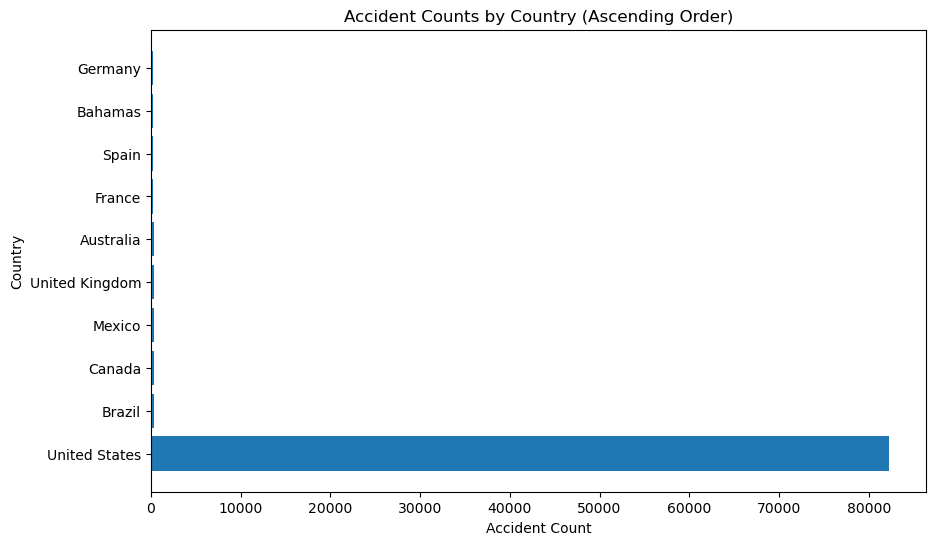

In [205]:
plt.figure(figsize=(10, 6))
plt.barh(highest_countries.index, highest_countries['Accident_Count'])
plt.xlabel('Accident Count')
plt.ylabel('Country')
plt.title('Accident Counts by Country (Ascending Order)')
plt.show()

### Q2. Which 10 states in the United States reported the highest number of aviation accidents?

In [207]:
us_data = aviation[aviation['country'] == 'United States'] 
us_data.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,Fatal,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0


In [208]:
#checking if the eventID has all unique values
num_unique_values = us_data['event_id'].nunique()
num_unique_values

78664

In [209]:
#above sbows there are duplicates. Dropping them- 
us_data = us_data.drop_duplicates(subset='event_id', keep='first')

#counting no. of rows now 
len(us_data)

78664

In [210]:
state_counts = us_data['state'].value_counts()
state_counts

state
California        8484
Texas             5602
Florida           5540
Alaska            5447
Arizona           2699
Colorado          2611
Washington        2496
Michigan          1971
Illinois          1968
Georgia           1916
New York          1815
Ohio              1742
Pennsylvania      1708
Oregon            1700
North Carolina    1568
Missouri          1517
Wisconsin         1480
Arkansas          1468
Minnesota         1406
Idaho             1363
New Mexico        1317
Utah              1277
Indiana           1266
Virginia          1223
Oklahoma          1183
Nevada            1172
Louisiana         1159
New Jersey        1109
Alabama           1108
Kansas            1062
Tennessee         1048
Montana           1013
Massachusetts      930
South Carolina     923
Mississippi        788
Iowa               788
Maryland           779
Wyoming            715
Nebraska           694
Kentucky           625
North Dakota       544
Maine              490
Connecticut        488
Hawai

In [211]:
highest_accidents= us_data.groupby("state")["investigation_type"].count()
highest_accidents

state
Alabama           1108
Alaska            5447
Arizona           2699
Arkansas          1468
Atlantic ocean      16
California        8484
Colorado          2611
Connecticut        488
Delaware           110
Florida           5540
Georgia           1916
Guam                 8
Gulf of mexico      44
Hawaii             476
Idaho             1363
Illinois          1968
Indiana           1266
Iowa               788
Kansas            1062
Kentucky           625
Louisiana         1159
Maine              490
Maryland           779
Massachusetts      930
Michigan          1971
Minnesota         1406
Mississippi        788
Missouri          1517
Montana           1013
Nebraska           694
Nevada            1172
New Hampshire      354
New Jersey        1109
New Mexico        1317
New York          1815
North Carolina    1568
North Dakota       544
Ohio              1742
Oklahoma          1183
Oregon            1700
Pacific ocean       13
Pennsylvania      1708
Puerto Rico        110
Rhode

In [212]:
#arranging in descending order 
highest_accidents= highest_accidents.sort_values(ascending= False )
highest_accidents

state
California        8484
Texas             5602
Florida           5540
Alaska            5447
Arizona           2699
Colorado          2611
Washington        2496
Michigan          1971
Illinois          1968
Georgia           1916
New York          1815
Ohio              1742
Pennsylvania      1708
Oregon            1700
North Carolina    1568
Missouri          1517
Wisconsin         1480
Arkansas          1468
Minnesota         1406
Idaho             1363
New Mexico        1317
Utah              1277
Indiana           1266
Virginia          1223
Oklahoma          1183
Nevada            1172
Louisiana         1159
New Jersey        1109
Alabama           1108
Kansas            1062
Tennessee         1048
Montana           1013
Massachusetts      930
South Carolina     923
Mississippi        788
Iowa               788
Maryland           779
Wyoming            715
Nebraska           694
Kentucky           625
North Dakota       544
Maine              490
Connecticut        488
Hawai

In [213]:
#fetching the top 10 states 
highest_accidents_10= highest_accidents[0:10]
highest_accidents_10.to_frame(name= "accidents")

,accidents
state,
California,8484
Texas,5602
Florida,5540
Alaska,5447
Arizona,2699
Colorado,2611
Washington,2496
Michigan,1971
Illinois,1968


Text(0.5, 1.0, 'Top 10 States by Accident Count')

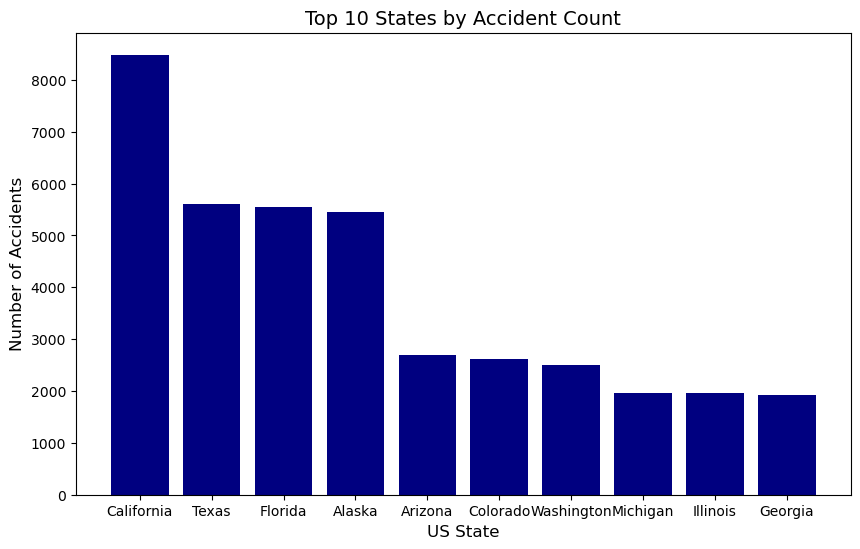

In [214]:
plt.figure(figsize=(10, 6))
plt.bar(highest_accidents_10.index, highest_accidents_10.values, width=0.8, color= "navy")

plt.xlabel('US State', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Top 10 States by Accident Count', fontsize=14)

In [215]:
df_highest_accidents= highest_accidents.to_frame(name= "Accidents in US States")
df_highest_accidents

,Accidents in US States
state,
California,8484
Texas,5602
Florida,5540
Alaska,5447
Arizona,2699
Colorado,2611
Washington,2496
Michigan,1971
Illinois,1968


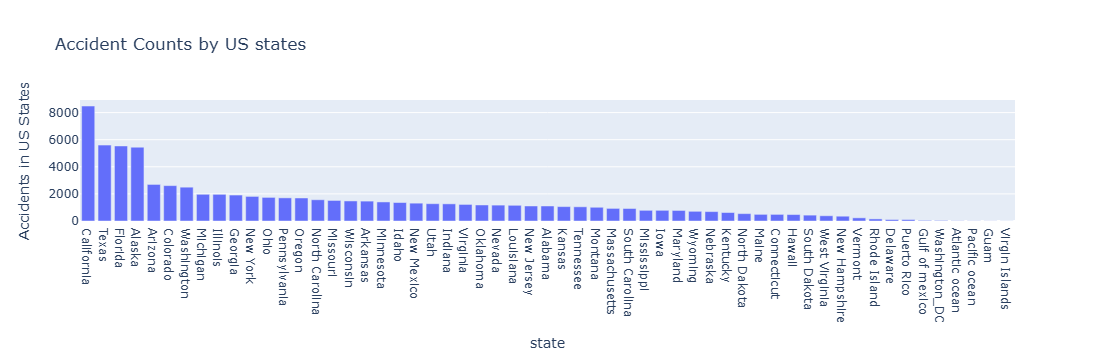

In [216]:
import plotly.express as px

fig = px.bar(df_highest_accidents, x=df_highest_accidents.index, y='Accidents in US States', title='Accident Counts by US states')
fig.show()

### Q3. Which types of injury severities (e.g., Fatal, Serious, Minor) were most common in the top 10 states with the highest number of aviation accidents?

In [218]:
temp = ['state', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_injuries', 'investigation_type']
injury_data= us_data[temp]
injury_data

,state,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries,investigation_type
0,Idaho,2.0,0.0,0.0,2.0,Accident
1,California,4.0,0.0,0.0,4.0,Accident
2,Virginia,3.0,0.0,0.0,3.0,Accident
3,California,2.0,0.0,0.0,2.0,Accident
4,Ohio,1.0,2.0,0.0,3.0,Accident
...,...,...,...,...,...,...
85370,Oregon,0.0,0.0,0.0,0.0,Accident
85374,Idaho,1.0,0.0,0.0,1.0,Accident
85375,Maryland,0.0,0.0,0.0,0.0,Accident
85376,Florida,1.0,0.0,0.0,1.0,Accident


In [219]:
injury_count= injury_data.groupby("state")[["total_fatal_injuries", "total_serious_injuries", "total_minor_injuries", "total_injuries" ]].sum()
injury_count.head()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries
state,,,,
Alabama,453.0,227.0,249.0,929.0
Alaska,1230.0,1014.0,1254.0,3498.0
Arizona,937.0,589.0,796.0,2322.0
Arkansas,441.0,317.0,390.0,1148.0
Atlantic ocean,14.0,4.0,4.0,22.0


In [220]:
top_10_states = injury_count.nlargest(10, 'total_injuries')
top_10_states

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries
state,,,,
California,3645.0,1932.0,2517.0,8094.0
Texas,1858.0,1229.0,1777.0,4864.0
Florida,1836.0,1168.0,1655.0,4659.0
Alaska,1230.0,1014.0,1254.0,3498.0
New York,1348.0,527.0,839.0,2714.0
Arizona,937.0,589.0,796.0,2322.0
Colorado,961.0,643.0,718.0,2322.0
Washington,745.0,461.0,659.0,1865.0
Pennsylvania,765.0,531.0,533.0,1829.0


C:\Users\Vidhi Desai\AppData\Local\Temp\ipykernel_3640\1533675464.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Vidhi Desai\AppData\Local\Temp\ipykernel_3640\1533675464.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



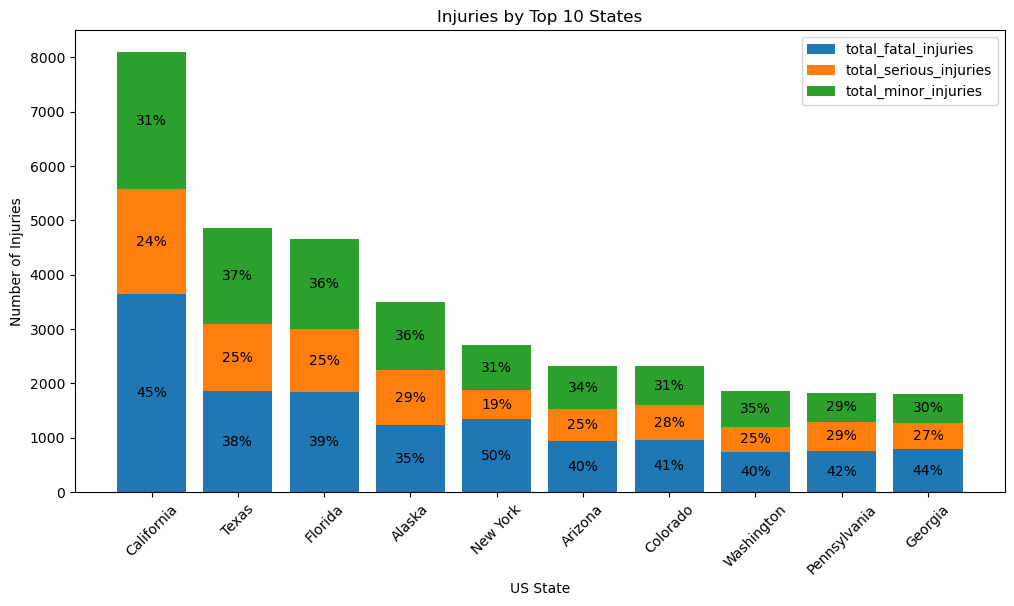

In [221]:
# Define injury types
injury_types = ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']

# Create a list to store the bottom values for each stack
bottom = [0] * len(top_10_states)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))

for i, injury_type in enumerate(injury_types):
    plt.bar(top_10_states.index, top_10_states[injury_type], label=injury_type, bottom=bottom)
    bottom = bottom + top_10_states[injury_type]

    # Calculate and add percentage labels
    for j, state in enumerate(top_10_states.index):
        percentage = (top_10_states[injury_type][j] / top_10_states['total_injuries'][j]) * 100
        plt.text(j, bottom[j] - (top_10_states[injury_type][j] / 2), f'{percentage:.0f}%', ha='center', va='center')

# Add labels and title
plt.xlabel('US State')
plt.ylabel('Number of Injuries')
plt.title('Injuries by Top 10 States')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

### Q4. How has the frequency of aviation accidents changed in the United States over the period 1982–2022, and are there any discernible trends or patterns in the data?

In [223]:
us_data.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,Fatal,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0


In [224]:
# Convert 'event_date' to datetime format if not already
us_data['event_date'] = pd.to_datetime(us_data['event_date'], errors='coerce')

# Extract the year from the datetime column
us_data['year'] = us_data['event_date'].dt.year

us_data.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,...,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries,year
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal,Destroyed,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0,1948
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,Fatal,Destroyed,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0,1962
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,Fatal,Destroyed,Cessna,...,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0,1974
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,Fatal,Destroyed,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0,1977
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,Fatal,Destroyed,Cessna,...,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0,1979


In [225]:
time_series= df.groupby(us_data['year'])['event_id'].count()
time_series= pd.DataFrame(time_series)
time_series.columns = [ 'Accident_Count']
time_series.reset_index()

,year,Accident_Count
0,1948.0,1
1,1962.0,1
2,1974.0,1
3,1977.0,1
4,1979.0,2
5,1981.0,1
6,1982.0,3519
7,1983.0,3481
8,1984.0,3368
9,1985.0,3023


In [226]:
time_series_filtered = time_series.drop(index=time_series.index[:6]) 
time_series= time_series_filtered
time_series

,Accident_Count
year,
1982.0,3519
1983.0,3481
1984.0,3368
1985.0,3023
1986.0,2797
1987.0,2718
1988.0,2617
1989.0,2453
1990.0,2427


In [227]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'Accident_Count ~ time_series.index', data = time_series) 
results = model.fit()

#Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Accident_Count   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     357.3
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.33e-20
Time:                        17:53:17   Log-Likelihood:                -260.23
No. Observations:                  39   AIC:                             524.5
Df Residuals:                      37   BIC:                             527.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.077e+05   5590.89

Text(0.5, 1.0, 'Scatter Plot of No. of Accidents from 1982-2022')

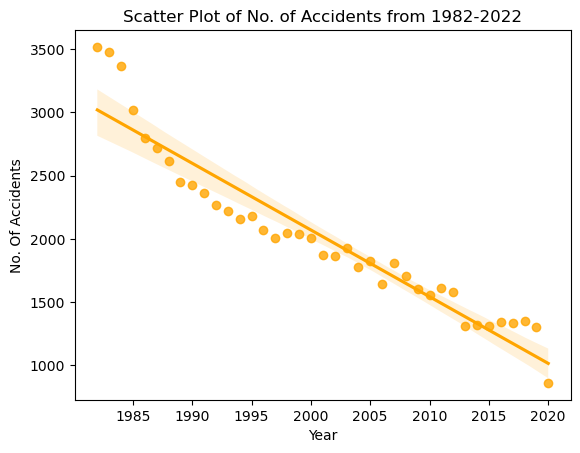

In [228]:
# Plot the time series analysis 

sns.regplot(x= time_series.index, y= time_series["Accident_Count"], color= "orange")

plt.xlabel("Year")
plt.ylabel("No. Of Accidents")

plt.title("Scatter Plot of No. of Accidents from 1982-2022")

### Q5. How do factors such as no. of engines, type of injuries, weather conditions, extent of aircraft damage and engine type correlate with the severity of aviation accidents?

In [230]:
correl_data = aviation.copy()

correl_data.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,Fatal,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0


In [231]:
# Insert a column for injury_severity_fatal -'Fatal'=True,'Non-Fatal'=False
correl_data['injury_severity'] = (correl_data['injury_severity'] == 'Fatal')

# Insert a column for 'engine_type_Reciprocating' - 'Reciprocationg'=True, otherwise = False
correl_data['engine_type_Reciprocating'] = (correl_data['engine_type'] == 'Reciprocating')

In [232]:
# Define a function that will convert the extra field values to other

def convert_column_to_other(df, column_name, threshold):
    # Compute value counts for the column
    value_counts = df[column_name].value_counts()
    
    # Identify values to convert
    values_to_keep = value_counts[value_counts >= threshold].index
    
    # Apply conversion
    df[column_name] = df[column_name].apply(lambda x: x if x in values_to_keep else 'Other')
    
    return df

In [233]:
correl_data = convert_column_to_other(correl_data, 'broad_phase_of_flight', 6000)
correl_data = convert_column_to_other(correl_data, 'make', 10000)

In [234]:
correl_data.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,...,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries,engine_type_Reciprocating
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,True,Destroyed,Other,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0,True
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,True,Destroyed,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0,True
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,True,Destroyed,Cessna,...,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0,True
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,True,Destroyed,Other,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0,True
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,True,Destroyed,Cessna,...,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0,False


In [235]:
correlation_matrix = correl_data[['number_of_engines', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',  
                             'aircraft_damage', 'engine_type_Reciprocating', 'weather_condition', 'injury_severity']]

correlation_matrix = pd.get_dummies(correlation_matrix)

In [236]:
pd.get_dummies(correlation_matrix, drop_first= True)

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,engine_type_Reciprocating,injury_severity,aircraft_damage_Destroyed,aircraft_damage_Minor,aircraft_damage_Substantial,aircraft_damage_Unknown,weather_condition_IMC,weather_condition_VMC
0,1.0,2.0,0.0,0.0,True,True,True,False,False,False,True,False
1,1.0,4.0,0.0,0.0,True,True,True,False,False,False,True,False
2,1.0,3.0,0.0,0.0,True,True,True,False,False,False,True,False
3,1.0,2.0,0.0,0.0,True,True,True,False,False,False,True,False
4,NaN,1.0,2.0,0.0,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
88860,NaN,0.0,1.0,0.0,False,True,False,True,False,False,False,True
88861,NaN,0.0,0.0,0.0,False,False,False,True,False,False,False,True
88862,1.0,0.0,0.0,0.0,False,False,False,False,True,False,False,True
88863,NaN,0.0,0.0,0.0,False,False,False,True,False,False,False,True


In [237]:
final_matrix = correlation_matrix.corr()
final_matrix

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,engine_type_Reciprocating,injury_severity,aircraft_damage_Destroyed,aircraft_damage_Minor,aircraft_damage_Substantial,aircraft_damage_Unknown,weather_condition_IMC,weather_condition_VMC
number_of_engines,1.000000,0.092163,0.042705,0.090042,-0.289463,0.147508,0.028815,0.360530,-0.203374,-0.000483,0.182328,-0.182328
total_fatal_injuries,0.092163,1.000000,0.108014,0.035819,-0.083128,0.199033,0.163060,-0.025430,-0.135131,-0.003655,0.118712,-0.118712
total_serious_injuries,0.042705,0.108014,1.000000,0.216460,-0.061745,0.003717,0.047748,0.018161,-0.053272,-0.002492,0.025049,-0.025049
total_minor_injuries,0.090042,0.035819,0.216460,1.000000,-0.054217,-0.019463,0.004825,0.037384,-0.024447,-0.001665,0.019391,-0.019391
engine_type_Reciprocating,-0.289463,-0.083128,-0.061745,-0.054217,1.000000,-0.161979,-0.003203,-0.361703,0.202323,-0.058246,-0.210196,0.210196
injury_severity,0.147508,0.199033,0.003717,-0.019463,-0.161979,1.000000,0.548378,0.083879,-0.547622,0.012128,0.294249,-0.294249
aircraft_damage_Destroyed,0.028815,0.163060,0.047748,0.004825,-0.003203,0.548378,1.000000,-0.131428,-0.842340,-0.017113,0.218386,-0.218386
aircraft_damage_Minor,0.360530,-0.025430,0.018161,0.037384,-0.361703,0.083879,-0.131428,1.000000,-0.418408,-0.008500,0.128087,-0.128087
aircraft_damage_Substantial,-0.203374,-0.135131,-0.053272,-0.024447,0.202323,-0.547622,-0.842340,-0.418408,1.000000,-0.054480,-0.269522,0.269522
aircraft_damage_Unknown,-0.000483,-0.003655,-0.002492,-0.001665,-0.058246,0.012128,-0.017113,-0.008500,-0.054480,1.000000,0.009930,-0.009930


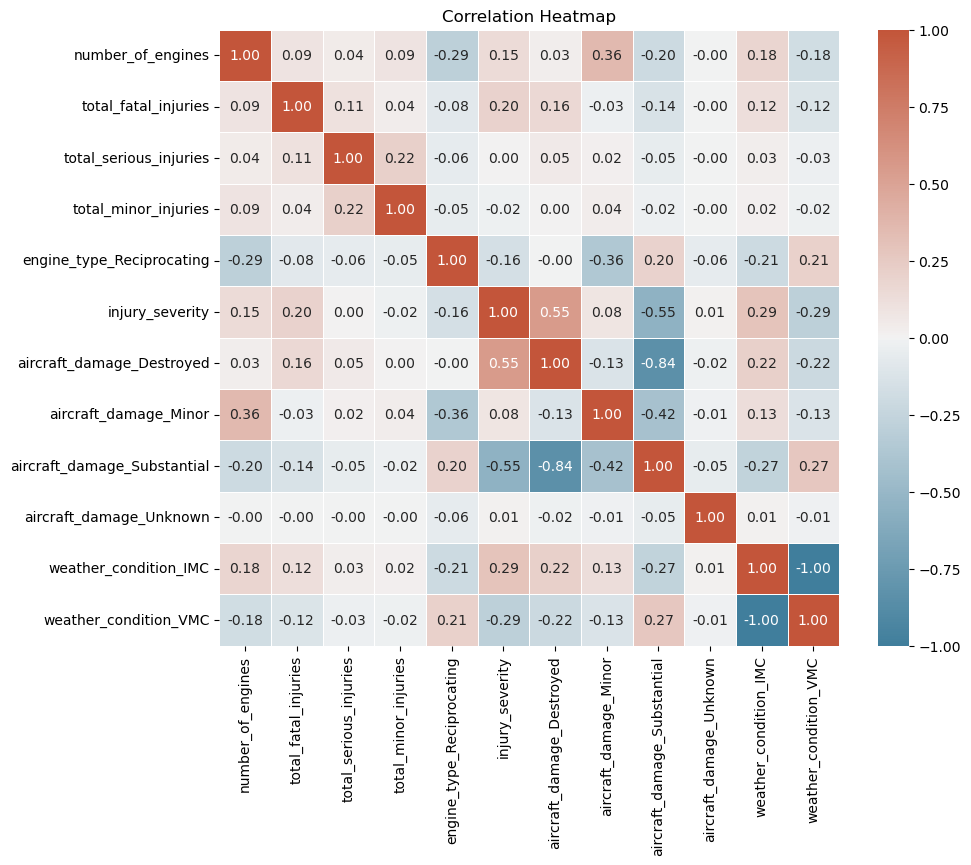

In [238]:
# Define the colormap for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(final_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Q6. Which Phase of Flight Causes the Most Fatal Injuries?

In [240]:
aviation.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,Fatal,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0


In [241]:
# Group by 'Broad.phase.of.flight' and sum fatal injuries
phase_fatalities = aviation.groupby('broad_phase_of_flight')['total_fatal_injuries'].sum()

phase_fatalities

broad_phase_of_flight
Approach        8447.0
Climb           1754.0
Cruise          6142.0
Descent         1088.0
Go-around        591.0
Landing        16585.0
Maneuvering     5386.0
Standing         154.0
Takeoff         9716.0
Taxi             102.0
Name: total_fatal_injuries, dtype: float64

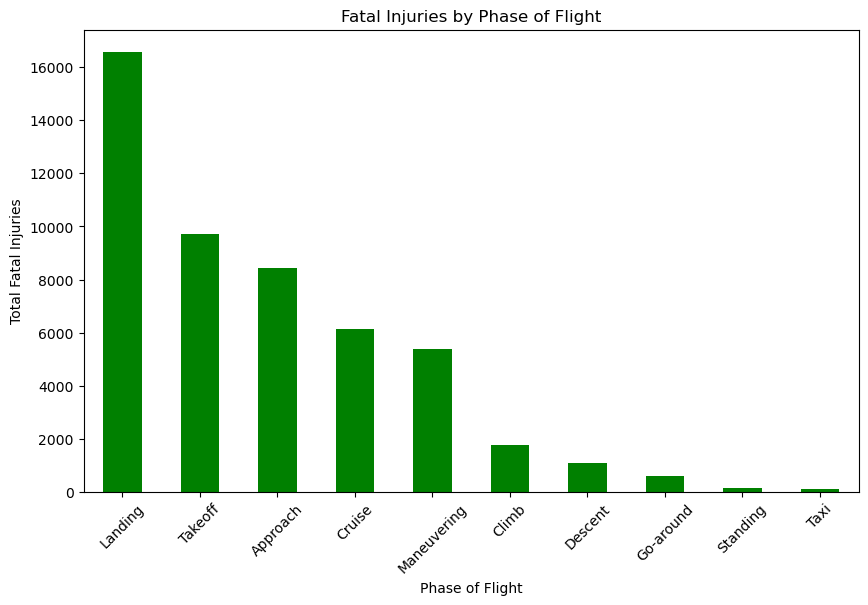

In [242]:
# Plot the data
phase_fatalities.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Fatal Injuries by Phase of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)

plt.savefig('Injuries_Phase_flight.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

### Q7. Are There Specific Months or Seasons with a Higher Frequency of Accidents?

In [244]:
aviation['event_date'] = pd.to_datetime(aviation['event_date'], errors = 'coerce')

In [245]:
# Define a function to extract Season from Event Date
def season(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Extract month and season
aviation['Month'] = aviation['event_date'].dt.month
aviation['Season'] = aviation['Month'].apply(season)

In [246]:
aviation.head()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,...,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries,Month,Season
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",ID,Idaho,United States,Fatal,Destroyed,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0,10,Fall
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",CA,California,United States,Fatal,Destroyed,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,IMC,Landing,4.0,7,Summer
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",VA,Virginia,United States,Fatal,Destroyed,Cessna,...,Reciprocating,Personal,3.0,0.0,0.0,IMC,Cruise,3.0,8,Summer
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",CA,California,United States,Fatal,Destroyed,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,2.0,6,Summer
4,20041105X01764,Accident,1979-08-02,"Canton, OH",OH,Ohio,United States,Fatal,Destroyed,Cessna,...,NaN,Personal,1.0,2.0,0.0,VMC,Approach,3.0,8,Summer


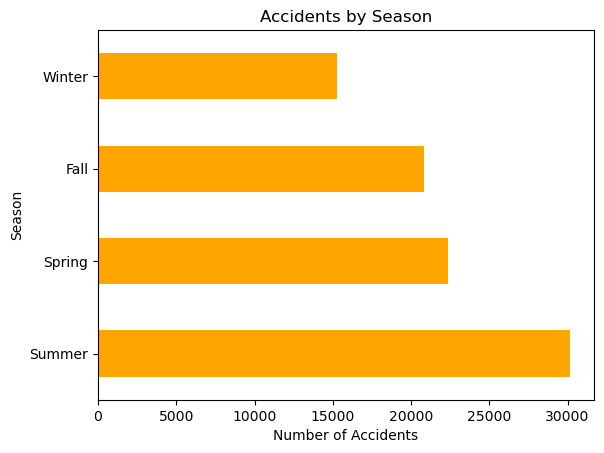

In [247]:
# Plot accidents by season
season_counts = aviation['Season'].value_counts()
season_counts.plot(kind='barh', color='orange')
plt.title('Accidents by Season')
plt.ylabel('Season')
plt.xlabel('Number of Accidents')

plt.savefig('Seasonal_accidents.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [248]:
plt.savefig('Seasonal_accidenres.jpeg', format='jpeg', dpi=300)

<Figure size 640x480 with 0 Axes>

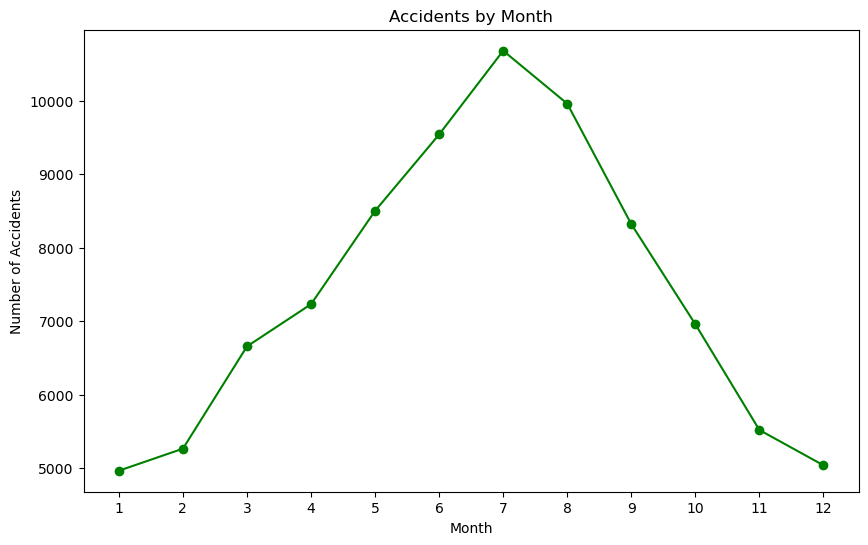

In [249]:
# Plot accidents by month
month_counts = aviation['Month'].value_counts().sort_index()
month_counts.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Accidents by Month')
plt.ylabel('Number of Accidents')
plt.xlabel('Month')
plt.xticks(range(1, 13))

plt.savefig('Monthly_accidents.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

### Q8. How Does Weather Conditions Affect Severity of Injuries?

In [251]:
# Calculate and plot the proportion of Fatal and Non-fatal accidents to check severity

accident_counts = aviation['injury_severity'].value_counts()
accident_percentages = (accident_counts / accident_counts.sum()) * 100

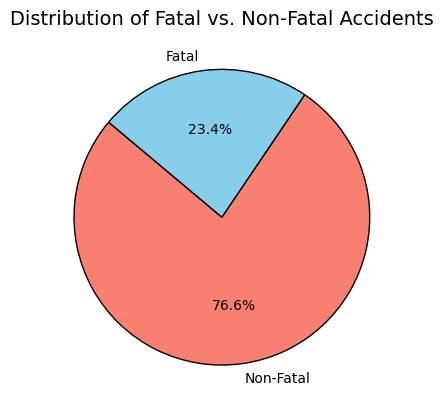

In [252]:
# Create the pie chart
accident_percentages.plot(kind='pie', 
                          autopct='%1.1f%%', 
                          startangle=140, 
                          colors=['salmon', 'skyblue'], 
                          labels=accident_percentages.index, 
                          wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Fatal vs. Non-Fatal Accidents', fontsize=14)
plt.ylabel('')  # Hide the default y-axis label

plt.savefig('Severity_proportion.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [253]:
# We will be applying Regression Analysis to see if Weather Condition affect accident severity.

In [254]:
# Simplify the 'Injury Severity' column into binary values (Fatal = 1, Non-fatal = 0)

aviation['injury_severity_binary'] = aviation['injury_severity'].apply(lambda x: 0 if 'Non-Fatal' in str(x) else 1)
aviation.tail()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,...,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries,Month,Season,injury_severity_binary
88860,2.02E+13,Accident,2022-12-26,"Annapolis, MD",MD,Maryland,United States,Fatal,Minor,PIPER,...,Personal,0.0,1.0,0.0,VMC,Standing,1.0,12,Winter,1
88861,2.02E+13,Accident,2022-12-26,"Hampton, NH",NH,New Hampshire,United States,Non-Fatal,Minor,BELLANCA,...,NaN,0.0,0.0,0.0,VMC,Taxi,0.0,12,Winter,0
88862,2.02E+13,Accident,2022-12-26,"Payson, AZ",AZ,Arizona,United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,...,Personal,0.0,0.0,0.0,VMC,Taxi,0.0,12,Winter,0
88863,2.02E+13,Accident,2022-12-26,"Morgan, UT",UT,Utah,United States,Non-Fatal,Minor,CESSNA,...,Personal,0.0,0.0,0.0,VMC,Taxi,0.0,12,Winter,0
88864,2.02E+13,Accident,2022-12-29,"Athens, GA",GA,Georgia,United States,Fatal,Minor,PIPER,...,Personal,0.0,1.0,0.0,VMC,Standing,1.0,12,Winter,1


In [255]:
print(aviation['injury_severity_binary'].value_counts())

injury_severity_binary
0    67939
1    20700
Name: count, dtype: int64


In [256]:
# Convert Weather conditions into dummy variables (VMC =1, else 0)
aviation['weather_condition_binary'] = aviation['weather_condition'].apply(lambda x: 1 if 'VMC' in str(x) else 0)

In [257]:
print(aviation['weather_condition_binary'].value_counts())

weather_condition_binary
1    78844
0     9795
Name: count, dtype: int64


In [258]:
aviation.tail()

,event_id,investigation_type,event_date,location,state_id,state,country,injury_severity,aircraft_damage,make,...,total_fatal_injuries,total_serious_injuries,total_minor_injuries,weather_condition,broad_phase_of_flight,total_injuries,Month,Season,injury_severity_binary,weather_condition_binary
88860,2.02E+13,Accident,2022-12-26,"Annapolis, MD",MD,Maryland,United States,Fatal,Minor,PIPER,...,0.0,1.0,0.0,VMC,Standing,1.0,12,Winter,1,1
88861,2.02E+13,Accident,2022-12-26,"Hampton, NH",NH,New Hampshire,United States,Non-Fatal,Minor,BELLANCA,...,0.0,0.0,0.0,VMC,Taxi,0.0,12,Winter,0,1
88862,2.02E+13,Accident,2022-12-26,"Payson, AZ",AZ,Arizona,United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,...,0.0,0.0,0.0,VMC,Taxi,0.0,12,Winter,0,1
88863,2.02E+13,Accident,2022-12-26,"Morgan, UT",UT,Utah,United States,Non-Fatal,Minor,CESSNA,...,0.0,0.0,0.0,VMC,Taxi,0.0,12,Winter,0,1
88864,2.02E+13,Accident,2022-12-29,"Athens, GA",GA,Georgia,United States,Fatal,Minor,PIPER,...,0.0,1.0,0.0,VMC,Standing,1.0,12,Winter,1,1


In [259]:
import statsmodels.formula.api as smf

function = 'injury_severity_binary ~ weather_condition_binary'

model = smf.logit(formula = function, data = aviation)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.506970
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     injury_severity_binary   No. Observations:                88639
Model:                              Logit   Df Residuals:                    88637
Method:                               MLE   Df Model:                            1
Date:                    Fri, 20 Dec 2024   Pseudo R-squ.:                 0.06723
Time:                            17:53:21   Log-Likelihood:                -44937.
converged:                           True   LL-Null:                       -48176.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.3505      0.021  

In [260]:
# Predictive modeling Using sklearn:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Assign X and Y Variables for Logistic Regression

x = aviation[['weather_condition_binary',]]
y = aviation['injury_severity_binary']

In [261]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model.predict(X_test)

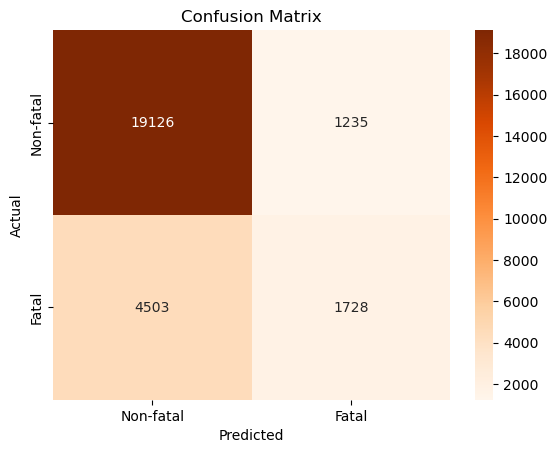

In [262]:
# Plotting confusion matrix for better visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Non-fatal', 'Fatal'], yticklabels=['Non-fatal', 'Fatal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [263]:
# Display coefficients for interpretability
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': log_model.coef_[0]})
print("\nFeature Importance (Coefficients):")
print(coefficients)


Feature Importance (Coefficients):
                    Feature  Coefficient
0  weather_condition_binary    -1.810892


In [264]:
# Define confusion matrix values
TN = 19126  # True Negatives
TP = 1728    # True Positives
FN = 4503   # False Negatives
FP = 1235    # False Positives

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

Prediction Accuracy: 78.42%
